# Inspirasi
Pada akhir kasus ini, akan dapat menjawab pertanyaan-pertanyaan di bawah ini.

- Bagaimana mencapai segmentasi pelanggan menggunakan algoritma pembelajaran mesin (KMeans Clustering) dengan Python dengan cara yang paling sederhana.
- Siapa target pelanggan Anda dengan siapa Anda dapat memulai strategi pemasaran [mudah dibicarakan]
- Bagaimana strategi pemasaran bekerja di dunia nyata

# Deskripsi dataset:
Saat ini, kami memiliki 200 entri data demografi pelanggan supermarket. Berikut adalah gambaran singkat tentang kolom dataset:

1. CustomerID: ID pelanggan yang diindeks oleh sistem keanggotaan
2. Gender: jenis kelamin pelanggan supermarket
3. Age: usia anggota supermarket
4. Annual Income (k$): pendapatan tahunan pelanggan dengan satuan ribu dolar
5. Spending Score (1-100): skor pengeluaran dari 1-100. 100 berarti pelanggan adalah pembeli yang aktif.

In [1]:
#Import Modul
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

### 1. Baca file CSV dengan Pandas.

In [2]:
customer_df = pd.read_csv("Mall_Customers.csv")
customer_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# shape of the dataset
print(customer_df.shape)

(200, 5)


Apakah ada data yang hilang?

In [4]:
# Fungsi reusable pribadi saya untuk mendeteksi data yang hilang
def missing_value_describe(data):
# Periksa nilai yang hilang dalam data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Jumlah kolom dengan nilai yang hilang:", missing_value_col_count)
    if missing_value_col_count != 0:
        # Mencetak nama kolom dengan persentase nilai yang hilang
        print("\nPersentase hilang (menurun):")
        print(missing_value_stats)
    else:
        print("Tidak ada data yang hilang!!!")
missing_value_describe(customer_df)

Jumlah kolom dengan nilai yang hilang: 0
Tidak ada data yang hilang!!!


Okey, Bagus! 

jadi tidak memiliki data yang hilang.

### 2. Analisis data eksploratori dari data anggota

#### 2.0 Bagaimana distribusi skor pengeluaran?

In [5]:
px.histogram(customer_df, y="Spending Score (1-100)", 
             marginal="rug", title="Spending score pengeluaran")

Observasi:
Dari histogram distribusi skor pengeluaran yang dikemas dengan penambahan 10, kita dapat melihat ada 3 puncak di sekitar skor pengeluaran 10-19, 40-49, dan 70-79 dengan jumlah pelanggan maksimal sebesar 39 jatuh ke dalam rentang skor pengeluaran 40-49. Data ini berpusat di sekitar rentang skor pengeluaran 40-49.

#### 2.1 Bagaimana distribusi skor pengeluaran dari pelanggan pria dan wanita?

In [6]:
customer_df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
px.box(customer_df, x="Spending Score (1-100)", y="Gender",
          color="Gender", points='all',
          title="Distribusi skor pengeluaran berdasarkan gender")

In [8]:
# Ringkasan statistik skor pengeluaran pelanggan pria
customer_df.query("Gender == 'Male'")["Spending Score (1-100)"].describe()

count    88.000000
mean     48.511364
std      27.896770
min       1.000000
25%      24.500000
50%      50.000000
75%      70.000000
max      97.000000
Name: Spending Score (1-100), dtype: float64

In [9]:
# Ringkasan statistik skor pengeluaran pelanggan wanita

customer_df.query("Gender == 'Female'")["Spending Score (1-100)"].describe()

count    112.000000
mean      51.526786
std       24.114950
min        5.000000
25%       35.000000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

<b>Observasi:</b>
 
Dari visualisasi di atas, kita dapat mengamati bahwa tidak ada perbedaan yang jelas antara median dan kuartil atas dari skor pengeluaran pelanggan pria dan wanita. Kuartil pertama dari skor pengeluaran pria lebih rendah sebesar 10,5 unit dibandingkan dengan kuartil pertama dari skor pengeluaran wanita. Skor pengeluaran maksimum (99) untuk wanita lebih tinggi dari skor pengeluaran maksimum (97) untuk pria. Skor pengeluaran minimum (5) untuk wanita lebih tinggi dari skor pengeluaran minimum (1) untuk pria.


#### 2.2 Bagaimana distribusi skor pengeluaran dari kelompok usia yang berbeda?

In [10]:
px.histogram(customer_df, x="Age", title="Distribusi usia pelanggan", nbins=10)


<b>Observasi:</b>

Distribusi data usia pelanggan relatif normal dengan berpusat pada rentang usia 30-39 dengan total jumlah 61 pelanggan.


In [11]:
customer_df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [12]:
# Buat kolom baru kelompok usia dengan penambahan 10 unit
def bin_age(age):
    if age < 20: return "10-19"
    elif age < 30: return "20-29"
    elif age < 40: return "30-39"
    elif age < 50: return "40-49"
    elif age < 60: return "50-49"
    elif age < 70: return "60-69"
    else: return "70-79"

customer_df["age_group"] = customer_df.Age.apply(bin_age)


In [13]:
customer_df["age_group"].unique()

array(['10-19', '20-29', '30-39', '60-69', '50-49', '40-49', '70-79'],
      dtype=object)

In [14]:
age_group_order = ['10-19', '20-29', '30-39', '40-49', '50-49', '60-69', '70-79']
px.box(customer_df, y="Spending Score (1-100)", x="age_group",
       title="Distribusi skor pengeluaran berdasarkan kelompok umur dan kelompok gender",
       color="Gender",
       category_orders={"age_group": age_group_order},
       facet_row="Gender")

<b>Observation:</b>

Dari plot kotak di atas, kita dapat mengamati bahwa distribusi kedua kelompok gender memiliki pola yang sama untuk dua kelompok usia 20-29 dan 30-39. Skor pengeluaran rata-rata 30-39 adalah yang tertinggi dibandingkan dengan kelompok usia lainnya.

#### 2.3 Apa distribusi pendapatan tahunan dari berbagai kelompok umur?

In [15]:
age_group_order = ['10-19', '20-29', '30-39', '40-49', '50-49', '60-69', '70-79']
px.box(customer_df, y="Annual Income (k$)", x="age_group",
       title="Distribusi pendapatan tahunan berdasarkan kelompok umur dan kelompok gender",
       color="Gender",
       category_orders={"age_group": age_group_order},
       facet_row="Gender")

<b>Observation:</b>

Dari plot kotak di atas, kita dapat mengamati bahwa pendapatan tahunan rata-rata tertinggi untuk pelanggan pria adalah 78K untuk kelompok usia 30-39 dan pendapatan tahunan medina tertinggi untuk pelanggan wanita adalah 74K untuk kelompok usia 30-39. Kelompok usia 30-39 juga merupakan kelompok usia dengan skor pengeluaran tertinggi dari plot kotak di bagian sebelumnya.

#### 2.4 Apa korelasi antara skor pengeluaran, usia, dan pendapatan?

In [16]:
customer_df.drop(["CustomerID"], axis=1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<b>Observation:</b>

Dari ringkasan di atas, kita dapat melihat koefisien Pearson antara variabel yang berbeda. Kami tidak melihat korelasi linier yang kuat antara usia, pendapatan, dan skor pengeluaran.

In [17]:
px.scatter(customer_df, 
       x="Annual Income (k$)", y="Spending Score (1-100)", 
       color="Gender",
       hover_name="Spending Score (1-100)",
       title="Hubungan non-linear antara pendapatan tahunan dan skor pengeluaran")

In [18]:
px.scatter(customer_df, 
       x="Age", y="Spending Score (1-100)", 
       color="Gender",
       hover_name="Spending Score (1-100)",
       title="Hubungan non-linear antara usia dan skor pengeluaran")

<b>Observation:</b>

Dari visualisasi di atas, kita melihat hubungan non-linear antara usia, pendapatan, dan skor pengeluaran. Kita tidak bisa hanya menyesuaikan model linier untuk memodelkan skor pengeluaran. Namun, kita dapat menggunakan algoritma pengelompokan tanpa pengawasan seperti K-mean untuk mengelompokkan pelanggan ke dalam segmen yang berbeda.


### 3. MENEMUKAN DAN MENGGANTI PENCILAN(Outliers)


In [19]:
#Creating a copy of the dataframe
dfCopy = customer_df.copy()

In [20]:
#renaming a column name
dfCopy.rename(columns = {'Spending Score (1-100)':'SpendingScore'}, inplace = True)
dfCopy.rename(columns = {'Annual Income (k$)':'AnnualIncome'}, inplace = True)
dfCopy

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,age_group
0,1,Male,19,15,39,10-19
1,2,Male,21,15,81,20-29
2,3,Female,20,16,6,20-29
3,4,Female,23,16,77,20-29
4,5,Female,31,17,40,30-39
...,...,...,...,...,...,...
195,196,Female,35,120,79,30-39
196,197,Female,45,126,28,40-49
197,198,Male,32,126,74,30-39
198,199,Male,32,137,18,30-39


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AnnualIncome'>

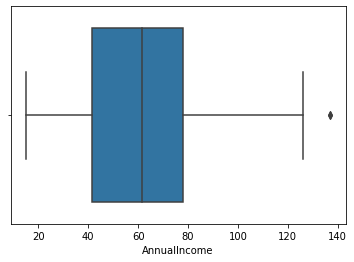

In [21]:
sns.boxplot(dfCopy.AnnualIncome)

<b>Observation:</b>

Terlihat jelas pendapatan tahunan pelanggan kisaran $135-$139 terdapat outlier, outlier tersebut  di hapus supaya hasil prediksi berjalan dengan baik

<AxesSubplot:xlabel='AnnualIncome'>

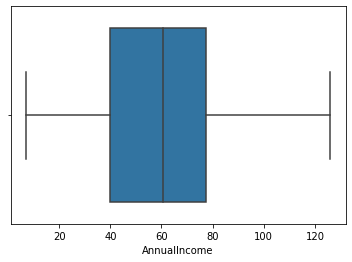

In [22]:
# Replacement of Outliers¶
q1=dfCopy.AnnualIncome.quantile(0.25)
q3=dfCopy.AnnualIncome.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
dfCopy['AnnualIncome'] = np.where(dfCopy['AnnualIncome'] > upper_limit, 7, dfCopy['AnnualIncome'])
sns.boxplot(x=dfCopy.AnnualIncome,showfliers = False)

<b>Observation:</b>

Data outlier sudahh di bersihkan tahan selanjut pemodelan data

#### 4. Label Encoding

In [23]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:

dfCopy.Gender=le.fit_transform(dfCopy.Gender)
dfCopy

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,age_group
0,1,1,19,15,39,10-19
1,2,1,21,15,81,20-29
2,3,0,20,16,6,20-29
3,4,0,23,16,77,20-29
4,5,0,31,17,40,30-39
...,...,...,...,...,...,...
195,196,0,35,120,79,30-39
196,197,0,45,126,28,40-49
197,198,1,32,126,74,30-39
198,199,1,32,7,18,30-39


#### MENINGKATKAN DATA(SCALING THE DATA)

In [25]:
#Dropping the CustomerID column and age_group
Up_data=dfCopy.drop(columns=['CustomerID',"age_group"],axis=1)
Up_data.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [26]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(Up_data)
X_scaled

array([[1.        , 0.01923077, 0.06722689, 0.3877551 ],
       [1.        , 0.05769231, 0.06722689, 0.81632653],
       [0.        , 0.03846154, 0.07563025, 0.05102041],
       [0.        , 0.09615385, 0.07563025, 0.7755102 ],
       [0.        , 0.25      , 0.08403361, 0.39795918],
       [0.        , 0.07692308, 0.08403361, 0.76530612],
       [0.        , 0.32692308, 0.09243697, 0.05102041],
       [0.        , 0.09615385, 0.09243697, 0.94897959],
       [1.        , 0.88461538, 0.10084034, 0.02040816],
       [0.        , 0.23076923, 0.10084034, 0.7244898 ],
       [1.        , 0.94230769, 0.10084034, 0.13265306],
       [0.        , 0.32692308, 0.10084034, 1.        ],
       [0.        , 0.76923077, 0.1092437 , 0.14285714],
       [0.        , 0.11538462, 0.1092437 , 0.7755102 ],
       [1.        , 0.36538462, 0.1092437 , 0.12244898],
       [1.        , 0.07692308, 0.1092437 , 0.79591837],
       [0.        , 0.32692308, 0.11764706, 0.34693878],
       [1.        , 0.03846154,

#### 6. Pemodelan K-mean untuk segmentasi anggota supermarket

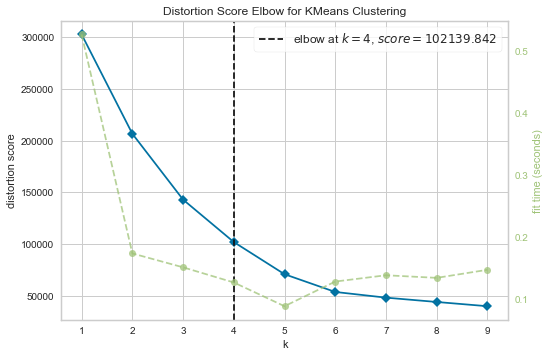

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

X = Up_data[["Age", "AnnualIncome", "SpendingScore"]]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

visualizer.fit(X)  
visualizer.show();

Menentukan k dari k-mean untuk pengelompokan:

Saya akan menggunakan metode siku di sini: melihat jumlah jarak intra-cluster, yang juga disebut sebagai inersia. Jarak intra-cluster adalah jarak antara setiap pusat cluster dan titik-titik di dalam cluster.

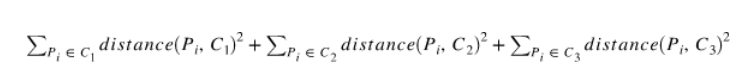

Mana
<b>C1, C2, C3</b> adalah sentroid <b>Pi</b> s adalah titik dalam  <b>jarak</b> cluster itu adalah jarak Euclidean yang biasa.

Inersia menurun saat K meningkat. Kita bisa hanya memilih k yang meminimalkan inersia karena inersia dapat diminimalkan menjadi 0 sebagai k menuju ukuran dataset.

Intuisinya adalah bahwa meningkatkan jumlah cluster akan meningkatkan kecocokan (menjelaskan lebih banyak variasi), karena ada lebih banyak parameter (lebih banyak cluster) untuk digunakan, maka perlu dilakukan penilaian yang cermat untuk memastikan bahwa peningkatan jumlah cluster benar-benar membantu dalam memperbaiki kualitas klasterisasi. 

Peningkatan jumlah cluster dapat meningkatkan kecocokan pada klasterisasi yang tidak terlalu optimal, tetapi dapat juga menurunkan kualitas klasterisasi pada data yang tidak memerlukan jumlah cluster yang lebih banyak. Selain itu, meningkatkan jumlah cluster juga dapat meningkatkan kompleksitas model dan berdampak pada peningkatan waktu komputasi serta sulitnya interpretasi hasil klasterisasi. Oleh karena itu, peningkatan jumlah cluster harus dilakukan secara hati-hati dan disesuaikan dengan jumlah data yang tersedia serta dengan melakukan validasi model secara berkelanjutan.


<b>Observation:</b>

Dari plot di atas, kita dapat berpendapat bahwa 4 cluster (titik infleksi pada kurva) sudah cukup.

In [28]:
# fit kmean model with k=4
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(X)
X["cluster"] = kmeans.predict(X)
X.head()

,Age,AnnualIncome,SpendingScore,cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,1
3,23,16,77,2
4,31,17,40,1


In [29]:
# cluster centers
kmeans.cluster_centers_

array([[32.76315789, 85.21052632, 82.10526316],
       [44.63917526, 48.20618557, 42.55670103],
       [24.71428571, 27.46428571, 75.07142857],
       [40.62162162, 85.64864865, 18.64864865]])

In [30]:
px.scatter_3d(X, x="AnnualIncome", y="SpendingScore", z="Age",
                    color = 'cluster', title="Segmentasi anggota supermarket")

Saya akan mencoba memecahnya menjadi plot 2D untuk analisis lebih lanjut.

In [32]:

px.box(X, x="cluster", y="AnnualIncome",points='all', color="cluster",
          title="Distribusi pendapatan tahunan berdasarkan cluster")

In [33]:
px.box(X, x="cluster", y="Age",points='all', color="cluster",
          title="Distribusi usia pelanggan berdasarkan klaster")

In [35]:
px.box(X, x="cluster", y="SpendingScore",points='all', color="cluster",
          title="Distribusi skor pengeluaran berdasarkan klaster")

##### Interpretasi segmentasi:
Dari hasil model pengelompokan K-mean di atas dengan k optimal yang dipilih menggunakan metode siku, dapat diamati 4 klaster menarik yang diwarnai dengan warna jingga, biru, kuning, dan ungu.

Menganalisis cluster, kita dapat melihat apa yang diwakili oleh setiap cluster:


Cluster 0: kelompok pelanggan dengan inti pengeluaran rata-rata 84, pendapatan tahunan rata-rata 78.5k, dan usia rata-rata 32.
Klaster 1: kelompok pelanggan dengan inti pengeluaran rata-rata 47, pendapatan tahunan rata-rata 54k, dan usia rata-rata 47.

Klaster 2: kelompok pelanggan dengan inti pengeluaran rata-rata 75.5, pendapatan tahunan rata-rata 26.5k, dan usia rata-rata 23.
Klaster 3: kelompok pelanggan dengan inti pengeluaran rata-rata 16, pendapatan tahunan rata-rata 79k, dan usia rata-rata 42.


Dengan kata lain mengenai visualisasi segmentasi:

Pelanggan Cluster 0 berusia 32-an, berpenghasilan rata-rata 78.5k, mereka paling sering berbelanja dengan skor pengeluaran tinggi kisaran 84k.
Pelanggan Cluster 1 adalah pelanggan yang lebih tua di usia akhir 40 hingga 50-an, memiliki pendapatan rata-rata 54k dan menghabiskan lebih sedikit dari klaster .

Pelanggan Cluster 2 berusia 32-an, berpenghasilan rendah rata-rata 26.5k, akan tetapi mereka sering berbelanja dengan skor pengeluaran kisaran 75.5k.
Pelanggan Cluster 3 berusia 16-an dan memiliki banyak pendapatan sekitar 79k dan sayang sekali mereka tidak sering berbelanja di supermarket.


In [36]:
# jumlah pelanggan di setiap cluster
pd.DataFrame(X.value_counts("cluster").reset_index(drop=True), columns=["customer count"])

,customer count
0,97
1,38
2,37
3,28


##### Pengamatan:

Berdasarkan data cluster yang dianalisis, terlihat bahwa terdapat perbedaan karakteristik antara kelompok pelanggan. Pelanggan di Cluster 0 memiliki usia yang relatif muda dan penghasilan yang cukup tinggi, serta cenderung berbelanja dengan pengeluaran yang tinggi. Sedangkan pelanggan di Cluster 1 memiliki usia yang lebih tua, dengan penghasilan yang lebih rendah dan pengeluaran yang cenderung lebih sedikit dibandingkan dengan Cluster 0. Pelanggan di Cluster 2 juga memiliki usia yang relatif muda, namun memiliki penghasilan yang rendah, tetapi cenderung berbelanja dengan pengeluaran yang cukup tinggi. Sementara itu, pelanggan di Cluster 3 memiliki pendapatan yang tinggi, namun tidak aktif berbelanja di supermarket. Hal ini menunjukkan bahwa segmentasi pelanggan dapat memberikan gambaran yang jelas mengenai kebiasaan belanja pelanggan dan dapat membantu dalam merancang strategi pemasaran yang lebih efektif dan efisien.

##### Saran:
- Untuk pelanggan Cluster 0 yang berusia 32-an dan berpenghasilan rata-rata 78.5k, supermarket dapat mempertimbangkan untuk menawarkan produk-produk dengan harga yang lebih tinggi dan berkualitas baik karena mereka cenderung memiliki skor pengeluaran yang tinggi.

- Pelanggan Cluster 1 yang lebih tua di usia akhir 40 hingga 50-an, dengan pendapatan rata-rata 54k dan menghabiskan lebih sedikit dari klaster lainnya, supermarket dapat mencoba menawarkan diskon khusus atau promosi yang menarik untuk menarik minat mereka untuk berbelanja lebih sering.

- Pelanggan Cluster 2 yang berusia 32-an dan berpenghasilan rendah rata-rata 26.5k, meskipun sering berbelanja dengan skor pengeluaran kisaran 75.5k, supermarket dapat menawarkan produk-produk yang lebih terjangkau untuk mempertahankan minat mereka untuk berbelanja.

- Pelanggan Cluster 3 yang berusia 16-an dan memiliki banyak pendapatan sekitar 79k namun tidak sering berbelanja di supermarket, supermarket dapat mencoba menarik minat mereka dengan menawarkan produk-produk atau promosi yang lebih sesuai dengan kebutuhan dan minat mereka.

